In [1]:
!pip install catboost
!pip install --upgrade scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 16.6 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.svm import SVC, NuSVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
warnings.filterwarnings("ignore")


In [3]:
train_data = pd.read_csv("/content/trainee_train.csv")
train_data.head()

,Unnamed: 0,im,v1,v2,v3,v4,v5,v6,v7,v8,...,v437,v438,v439,v440,v441,v442,v443,v444,v445,v446
0,0,0.0,128.100243,128.157072,129.255102,128.273006,126.532819,129.023232,129.854839,129.828431,...,128.800985,128.232694,128.211893,130.512476,130.411160,130.650165,130.904685,131.017268,130.477398,130.496150
1,1,1.0,128.100243,128.157072,126.636364,128.273006,130.810403,129.023232,128.633333,128.994152,...,128.914365,128.232694,128.211893,128.167519,130.411160,130.650165,130.904685,131.017268,130.477398,130.496150
2,2,1.0,128.100243,128.157072,129.255102,128.273006,130.810403,129.023232,126.769231,126.926295,...,128.800985,128.232694,128.211893,128.167519,128.051724,127.709786,127.349282,127.063052,125.169118,125.274194
3,3,1.0,128.100243,128.157072,127.630027,128.273006,126.532819,129.023232,126.769231,126.926295,...,128.800985,130.794007,131.026119,130.512476,130.411160,130.650165,130.904685,131.017268,130.477398,130.496150
4,4,1.0,128.100243,128.336364,129.255102,128.273006,130.810403,126.042980,129.854839,126.926295,...,128.800985,130.794007,131.026119,130.512476,130.411160,130.650165,130.904685,131.017268,130.477398,130.496150


<Axes: title={'center': 'Распределение классов'}, xlabel='im', ylabel='count'>

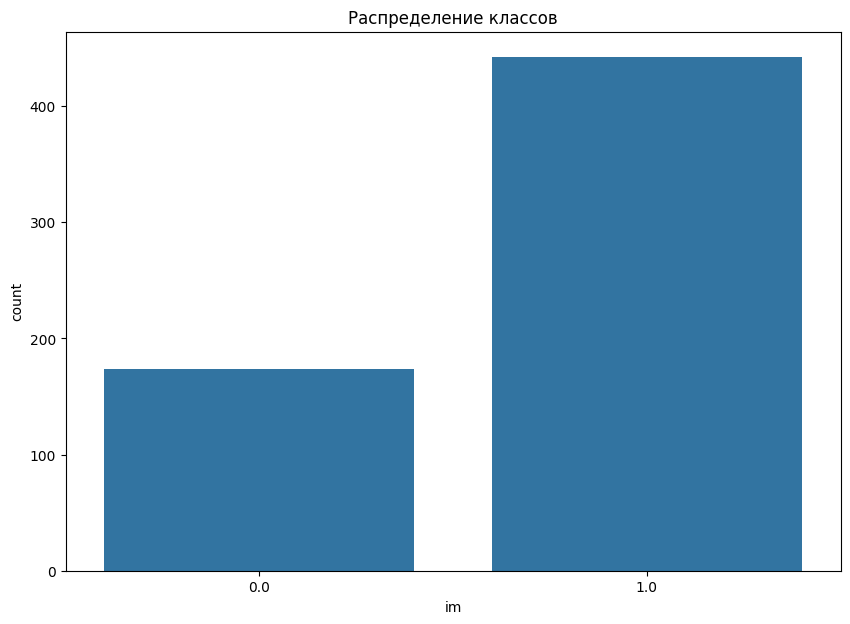

In [ ]:
plt.figure(figsize=(10, 7))
plt.title("Распределение классов")
sns.countplot(x = train_data['im'])

In [4]:
y_train = train_data.iloc[:, 1]
X_train = train_data.loc[:, train_data.columns !='im']
X_train = X_train.drop(columns = X_train.columns[0])
X_train

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,...,v437,v438,v439,v440,v441,v442,v443,v444,v445,v446
0,128.100243,128.157072,129.255102,128.273006,126.532819,129.023232,129.854839,129.828431,129.868526,128.618063,...,128.800985,128.232694,128.211893,130.512476,130.411160,130.650165,130.904685,131.017268,130.477398,130.496150
1,128.100243,128.157072,126.636364,128.273006,130.810403,129.023232,128.633333,128.994152,128.994152,128.618063,...,128.914365,128.232694,128.211893,128.167519,130.411160,130.650165,130.904685,131.017268,130.477398,130.496150
2,128.100243,128.157072,129.255102,128.273006,130.810403,129.023232,126.769231,126.926295,127.196460,128.618063,...,128.800985,128.232694,128.211893,128.167519,128.051724,127.709786,127.349282,127.063052,125.169118,125.274194
3,128.100243,128.157072,127.630027,128.273006,126.532819,129.023232,126.769231,126.926295,127.196460,127.433333,...,128.800985,130.794007,131.026119,130.512476,130.411160,130.650165,130.904685,131.017268,130.477398,130.496150
4,128.100243,128.336364,129.255102,128.273006,130.810403,126.042980,129.854839,126.926295,127.196460,128.618063,...,128.800985,130.794007,131.026119,130.512476,130.411160,130.650165,130.904685,131.017268,130.477398,130.496150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
611,128.100243,128.157072,129.255102,128.273006,130.810403,129.023232,129.854839,129.828431,129.868526,128.618063,...,128.800985,128.232694,128.211893,126.744108,130.411160,130.650165,130.904685,131.017268,130.477398,130.496150
612,128.100243,128.157072,129.255102,128.273006,126.532819,129.023232,126.769231,126.926295,127.196460,128.618063,...,128.800985,128.232694,128.211893,126.744108,130.411160,130.650165,130.904685,131.017268,130.477398,130.496150
613,130.798507,131.174905,129.255102,117.900000,132.860465,130.381148,129.854839,129.828431,129.868526,130.917969,...,128.914365,128.232694,128.211893,128.167519,128.051724,127.709786,127.349282,127.063052,125.169118,126.611554
614,128.100243,128.157072,129.255102,128.273006,126.532819,129.023232,129.854839,126.926295,127.196460,128.618063,...,128.800985,128.232694,128.211893,128.167519,128.051724,127.709786,127.349282,127.063052,130.477398,130.496150


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.2, random_state = 42)
X_test

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,...,v437,v438,v439,v440,v441,v442,v443,v444,v445,v446
78,128.100243,128.157072,129.255102,128.273006,126.532819,126.042980,127.720000,127.428571,127.428571,128.618063,...,128.800985,128.232694,128.211893,126.744108,126.100000,127.709786,127.349282,127.063052,125.169118,126.611554
208,128.100243,128.157072,129.255102,128.273006,126.532819,129.023232,126.769231,129.828431,129.868526,128.618063,...,128.800985,130.794007,131.026119,130.512476,130.411160,130.650165,130.904685,131.017268,130.477398,130.496150
570,128.100243,128.157072,129.255102,128.273006,126.532819,129.023232,129.854839,126.926295,127.196460,128.618063,...,128.800985,128.232694,128.211893,126.744108,126.100000,127.709786,127.349282,127.329412,130.477398,130.496150
181,128.100243,128.157072,129.255102,128.273006,130.810403,126.042980,129.854839,129.828431,129.868526,127.433333,...,128.800985,128.232694,128.211893,128.167519,128.051724,127.709786,127.349282,127.063052,125.169118,126.611554
101,128.100243,128.157072,126.636364,128.273006,126.532819,129.023232,126.769231,126.926295,127.196460,128.618063,...,128.800985,128.232694,128.211893,126.744108,130.411160,125.223301,130.904685,131.017268,130.477398,130.496150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,128.100243,128.157072,129.255102,113.000000,126.532819,129.023232,129.854839,129.828431,129.868526,128.618063,...,128.914365,128.232694,128.211893,128.167519,128.051724,127.709786,127.349282,127.063052,125.169118,126.611554
396,128.100243,128.157072,129.267241,128.273006,126.532819,129.023232,128.633333,128.994152,128.994152,128.618063,...,128.800985,130.794007,131.026119,130.512476,130.411160,130.650165,130.904685,131.017268,130.477398,130.496150
248,128.100243,128.157072,127.630027,128.273006,126.532819,129.023232,129.854839,126.926295,127.196460,127.433333,...,126.503759,128.232694,128.211893,128.167519,128.051724,127.709786,127.349282,127.063052,127.825000,126.611554
184,128.100243,128.157072,127.630027,128.273006,130.810403,129.023232,126.769231,126.926295,127.196460,127.433333,...,126.503759,128.232694,128.211893,128.167519,128.051724,127.709786,127.349282,127.063052,127.825000,126.611554


In [35]:
difference = []
#USAGE:
#[model, accuracy, precison, recall, f1, roc_auc]

Возьмем простой метод К ближайший соседей. Переберем количество и посмотрим на валидационную выборку, на ее скор.

In [7]:
model = KNeighborsClassifier()

model.fit(X_train, y_train)
result = model.predict(X_test)
accuracy = accuracy_score(y_test, result)
print("Точность модели на тестовом наборе данных:", accuracy)


Точность модели на тестовом наборе данных: 0.8225806451612904


In [8]:
knn_model_fold = KNeighborsClassifier()
kf = KFold(n_splits = 3)

cv_scores = cross_val_score(knn_model_fold, X_train, y_train, cv=kf, scoring='accuracy')

print("Средняя оценка точности на трейне:", cv_scores.mean())

Средняя оценка точности на трейне: 0.8638211382113821


In [ ]:
knn = KNeighborsClassifier()
number_neighbors = list(range(30))
weights = ['uniform', 'distance']
param_grid = {
    'n_neighbors': number_neighbors,
    'weights' : weights,
}
grid_search = GridSearchCV(knn, param_grid, cv=3, scoring='accuracy')

grid_search.fit(X_train, y_train)

print("Наилучшие гиперпараметры:", grid_search.best_params_)
print("Лучшая оценка качества:", grid_search.best_score_)

test_accuracy = grid_search.best_estimator_.score(X_test, y_test)
print("Accuracy на тестовом наборе:", test_accuracy)

Наилучшие гиперпараметры: {'n_neighbors': 3, 'weights': 'uniform'}
Лучшая оценка качества: 0.8780487804878049
Accuracy на тестовом наборе: 0.8629032258064516


In [36]:
model = KNeighborsClassifier(n_neighbors = 3)
model.fit(X_train, y_train)
result = model.predict(X_test)
accuracy = accuracy_score(y_test, result)
precision = precision_score (y_test, result)
recall = recall_score (y_test, result)
f1 = f1_score(y_test, result)
roc_auc = roc_auc_score(y_test, result)
difference.append(['KNeighborsClassifier', accuracy, precision, recall, f1, roc_auc])
print("Точность модели на тестовом наборе данных:", accuracy)

Точность модели на тестовом наборе данных: 0.8629032258064516


Теперь возьмем логистическую регрессию. Сделаем кросс-валидацию и посмотрим

Базовая логистическая регрессия

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)
result = model.predict(X_test)
accuracy = accuracy_score(y_test, result)
print("Точность модели на тестовом наборе данных:", accuracy)

Точность модели на тестовом наборе данных: 0.9032258064516129


In [ ]:
log_model = LogisticRegression()
kf = KFold(n_splits=5)
cv_scores = cross_val_score(log_model, X_train, y_train, cv=kf, scoring='accuracy')

print("Средняя оценка точности:", cv_scores.mean())

Средняя оценка точности: 0.8699237270665842


In [ ]:
log_model = LogisticRegression()

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'penalty' : ['l1', 'l2', 'elasticnet', None]}

grid_search2 = GridSearchCV(log_model, param_grid, cv=5, scoring='accuracy')
grid_search2.fit(X_train, y_train)

print("Наилучшие гиперпараметры:", grid_search2.best_params_)
print("Лучшая оценка качества:", grid_search2.best_score_)

test_accuracy = grid_search2.best_estimator_.score(X_test, y_test)
print("Accuracy на тестовой выборке:", test_accuracy)


Наилучшие гиперпараметры: {'C': 0.01, 'penalty': 'l2'}
Лучшая оценка качества: 0.867759224902082
Accuracy на тестовой выборке: 0.8629032258064516


In [37]:
model = LogisticRegression(C = 0.01, penalty = 'l2')
model.fit(X_train, y_train)
result = model.predict(X_test)
accuracy = accuracy_score(y_test, result)
precision = precision_score (y_test, result)
recall = recall_score (y_test, result)
f1 = f1_score(y_test, result)
roc_auc = roc_auc_score(y_test, result)
difference.append(['Logistic Regression', accuracy, precision, recall, f1, roc_auc])
print("Точность модели на тестовом наборе данных:", accuracy)

Точность модели на тестовом наборе данных: 0.8629032258064516


Перейдем дальше к SVM

In [ ]:
model = SVC()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Точность модели на тестовом наборе данных:", accuracy)

Точность модели на тестовом наборе данных: 0.8467741935483871


In [ ]:
svc_model = SVC()
kf = KFold(n_splits=5)
cv_scores = cross_val_score(svc_model, X_train, y_train, cv=kf, scoring='accuracy')
print("Средняя оценка точности:", cv_scores.mean())

Средняя оценка точности: 0.8881880024737168


In [ ]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['linear','rbf']}

grid = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')

grid.fit(X_train, y_train)

print("Наилучшие гиперпараметры:", grid.best_params_)
print("Лучшая оценка качества:", grid.best_score_)

test_accuracy = grid.best_estimator_.score(X_test, y_test)
print("Accuracy на тестовой выборке:", test_accuracy)

Наилучшие гиперпараметры: {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
Лучшая оценка качества: 0.8921871779014635
Accuracy на тестовой выборке: 0.9032258064516129


In [38]:
model = SVC(C = 10, gamma = 0.001, kernel = 'rbf')
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
precision = precision_score (y_test, predictions)
recall = recall_score (y_test, predictions)
f1 = f1_score(y_test, predictions)
roc_auc = roc_auc_score(y_test, predictions)
difference.append(['SVC', accuracy, precision, recall, f1, roc_auc])
print("Точность модели на тестовом наборе данных:", accuracy)

Точность модели на тестовом наборе данных: 0.9032258064516129


Как мы видим для SVC получилось затюнить гиперпараметры, что привело к увеличению скора на почти 0.06. Супер!


In [ ]:
model = NuSVC()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Точность модели на тестовом наборе данных:", accuracy)

Точность модели на тестовом наборе данных: 0.8064516129032258


In [ ]:
nusvc_model = NuSVC()
kf = KFold(n_splits=5)
cv_scores = cross_val_score(nusvc_model, X_train, y_train, cv=kf, scoring='accuracy')
print("Средняя оценка точности:", cv_scores.mean())

Средняя оценка точности: 0.8475159760874046


In [ ]:
nusvc_model = NuSVC()

nusvc_param_grid = {'nu': [0.1, 0.2, 0.3], 'kernel': ['linear', 'rbf', 'poly']}

nusvc_grid_search = GridSearchCV(nusvc_model, nusvc_param_grid, cv=5, scoring='accuracy')

nusvc_grid_search.fit(X_train, y_train)

print("Наилучшие гиперпараметры для NuSVC:", nusvc_grid_search.best_params_)
print("Лучшая оценка качества для NuSVC:", nusvc_grid_search.best_score_)
nusvc_test_accuracy = nusvc_grid_search.best_estimator_.score(X_test, y_test)
print("Accuracy на тестовом наборе данных для NuSVC:", nusvc_test_accuracy)

Наилучшие гиперпараметры для NuSVC: {'kernel': 'rbf', 'nu': 0.2}
Лучшая оценка качества для NuSVC: 0.8921871779014635
Accuracy на тестовом наборе данных для NuSVC: 0.9112903225806451


In [39]:
model = NuSVC(nu = 0.2, kernel = 'rbf')
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
precision = precision_score (y_test, predictions)
recall = recall_score (y_test, predictions)
f1 = f1_score(y_test, predictions)
roc_auc = roc_auc_score(y_test, predictions)
difference.append(['NuSVC', accuracy, precision, recall, f1, roc_auc])
print("Точность модели на тестовом наборе данных:", accuracy)

Точность модели на тестовом наборе данных: 0.9112903225806451


NuSVC дало качество еще лучше, за счет тюнинга удалось выиграть почти 0.1 аккураси скора.

Перейдем к DecisionTreeClassifier

In [ ]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Точность модели на тестовом наборе данных:", accuracy)

Точность модели на тестовом наборе данных: 0.7983870967741935


In [ ]:
model = DecisionTreeClassifier()
kf = KFold(n_splits=5)
cv_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='accuracy')
print("Средняя оценка точности:", cv_scores.mean())

Средняя оценка точности: 0.8088641517212946


In [ ]:
tree_model = DecisionTreeClassifier()
max_depth = list(range(15))
min_samples_split = list(range(15))
min_samples_leaf = list(range(10))
param_grid = {'max_depth': max_depth, 'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf}
grid_search = GridSearchCV(tree_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print("Наилучшие гиперпараметры:", grid_search.best_params_)
print("Лучшая оценка качества:", grid_search.best_score_)
test_accuracy = grid_search.best_estimator_.score(X_test, y_test)
print("Accuracy на тестовом наборе данных:", test_accuracy)

Наилучшие гиперпараметры: {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
Лучшая оценка качества: 0.843454957740672
Accuracy на тестовом наборе данных: 0.7903225806451613


In [40]:
model = DecisionTreeClassifier( max_depth = 3, min_samples_leaf = 5, min_samples_split = 2)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
precision = precision_score (y_test, predictions)
recall = recall_score (y_test, predictions)
f1 = f1_score(y_test, predictions)
roc_auc = roc_auc_score(y_test, predictions)
difference.append(['DecisionTreeClassifier', accuracy, precision, recall, f1, roc_auc])
print("Точность модели на тестовом наборе данных:", accuracy)

Точность модели на тестовом наборе данных: 0.7903225806451613


Перейдем к Bagging Classifier

In [ ]:
base_model = DecisionTreeClassifier()
model = BaggingClassifier(estimator=base_model)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Точность модели на тестовом наборе данных:", accuracy)

Точность модели на тестовом наборе данных: 0.8709677419354839


In [ ]:
base_model = DecisionTreeClassifier()
model = BaggingClassifier(estimator=base_model)
kf = KFold(n_splits=5)
cv_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='accuracy')
print("Средняя оценка точности:", cv_scores.mean())

Средняя оценка точности: 0.8656977942692228


In [ ]:
base_model = DecisionTreeClassifier()
bagging_model = BaggingClassifier(estimator=base_model)
n_estimators = list(range(10, 150, 10))
max_samples = [0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3]
max_features = [0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3]
param_grid = {'n_estimators': n_estimators, 'max_samples': max_samples, 'max_features': max_features}
grid_search = GridSearchCV(bagging_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print("Наилучшие гиперпараметры:", grid_search.best_params_)
print("Лучшая оценка качества:", grid_search.best_score_)
test_accuracy = grid_search.best_estimator_.score(X_test, y_test)
print("Accuracy на тестовом наборе данных:", test_accuracy)

Наилучшие гиперпараметры: {'max_features': 0.7, 'max_samples': 0.7, 'n_estimators': 70}
Лучшая оценка качества: 0.8962069676355391
Accuracy на тестовом наборе данных: 0.8790322580645161


In [41]:
base_model = DecisionTreeClassifier()
model = BaggingClassifier(estimator=base_model, max_features = 0.7, max_samples = 0.7, n_estimators = 70)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
precision = precision_score (y_test, predictions)
recall = recall_score (y_test, predictions)
f1 = f1_score(y_test, predictions)
roc_auc = roc_auc_score(y_test, predictions)
difference.append(['BaggingClassifier', accuracy, precision, recall, f1, roc_auc])
print("Точность модели на тестовом наборе данных:", accuracy)


Точность модели на тестовом наборе данных: 0.8790322580645161


Перейдем к BaggingClassifier + SVC

In [ ]:
base_model =  SVC(C = 10, gamma = 0.001, kernel = 'rbf')
model = BaggingClassifier(estimator=base_model)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Точность модели на тестовом наборе данных:", accuracy)

Точность модели на тестовом наборе данных: 0.8790322580645161


In [ ]:
base_model = SVC(C = 10, gamma = 0.001, kernel = 'rbf')
model = BaggingClassifier(estimator=base_model)
kf = KFold(n_splits=5)
cv_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='accuracy')
print("Средняя оценка точности:", cv_scores.mean())

Средняя оценка точности: 0.8861471861471861


In [ ]:
base_model_svc = SVC(C = 10, gamma = 0.001, kernel = 'rbf')
n_estimators = list(range(10, 100, 10))
max_samples = [0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3]
max_features = [0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3]
bagging_model_svc = BaggingClassifier(estimator=base_model_svc)
param_grid_svc = {'n_estimators': n_estimators, 'max_samples': max_samples, 'max_features': max_features }
grid_search_svc = GridSearchCV(bagging_model_svc, param_grid_svc, cv=5, scoring='accuracy')
grid_search_svc.fit(X_train, y_train)
print("Наилучшие гиперпараметры для BaggingClassifier с базовой моделью SVC:", grid_search_svc.best_params_)
print("Лучшая оценка качества для BaggingClassifier с базовой моделью SVC:", grid_search_svc.best_score_)
test_accuracy_svc = grid_search_svc.best_estimator_.score(X_test, y_test)
print("Accuracy на тестовом наборе данных для BaggingClassifier с базовой моделью SVC:", test_accuracy_svc)

Наилучшие гиперпараметры для BaggingClassifier с базовой моделью SVC: {'max_features': 0.6, 'max_samples': 0.5, 'n_estimators': 10}
Лучшая оценка качества для BaggingClassifier с базовой моделью SVC: 0.902329416615131
Accuracy на тестовом наборе данных для BaggingClassifier с базовой моделью SVC: 0.9112903225806451


In [42]:
base_model = SVC(C = 10, gamma = 0.001, kernel = 'rbf')
model = BaggingClassifier(estimator=base_model, max_features = 0.6, max_samples = 0.5, n_estimators = 10)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
precision = precision_score (y_test, predictions)
recall = recall_score (y_test, predictions)
f1 = f1_score(y_test, predictions)
roc_auc = roc_auc_score(y_test, predictions)
difference.append(['BaggingClassifier+SVC', accuracy, precision, recall, f1, roc_auc])
print("Точность модели на тестовом наборе данных:", accuracy)

Точность модели на тестовом наборе данных: 0.8870967741935484


Перейдем к BaggingClassifier с NuSVC

In [ ]:
base_model =  NuSVC(nu = 0.2, kernel = 'rbf')
model = BaggingClassifier(estimator=base_model)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Точность модели на тестовом наборе данных:", accuracy)

Точность модели на тестовом наборе данных: 0.8951612903225806


In [ ]:
base_model = NuSVC(nu = 0.2, kernel = 'rbf')
model = BaggingClassifier(estimator=base_model)
kf = KFold(n_splits=5)
cv_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='accuracy')
print("Средняя оценка точности:", cv_scores.mean())

Средняя оценка точности: 0.8881467738610596


In [ ]:
base_model_nusvc = NuSVC(nu = 0.2, kernel = 'rbf')
n_estimators = list(range(10, 100, 10))
max_samples = [0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3]
max_features = [0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3]
bagging_model_nusvc = BaggingClassifier(estimator=base_model_nusvc)
param_grid_nusvc = {'n_estimators': n_estimators, 'max_samples': max_samples, 'max_features': max_features }
grid_search_nusvc = GridSearchCV(bagging_model_nusvc, param_grid_nusvc, cv=5, scoring='accuracy')
grid_search_nusvc.fit(X_train, y_train)
print("Наилучшие гиперпараметры для BaggingClassifier с базовой моделью NuSVC:", grid_search_nusvc.best_params_)
print("Лучшая оценка качества для BaggingClassifier с базовой моделью NuSVC:", grid_search_nusvc.best_score_)
test_accuracy_nusvc = grid_search_nusvc.best_estimator_.score(X_test, y_test)
print("Accuracy на тестовом наборе данных для BaggingClassifier с базовой моделью NuSVC:", test_accuracy_nusvc)

Наилучшие гиперпараметры для BaggingClassifier с базовой моделью NuSVC: {'max_features': 0.5, 'max_samples': 0.7, 'n_estimators': 20}
Лучшая оценка качества для BaggingClassifier с базовой моделью NuSVC: 0.898227169655741
Accuracy на тестовом наборе данных для BaggingClassifier с базовой моделью NuSVC: 0.9032258064516129


In [43]:
base_model = NuSVC(nu = 0.2, kernel = 'rbf')
model = BaggingClassifier(estimator=base_model, max_features = 0.5, max_samples = 0.7, n_estimators = 20)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
precision = precision_score (y_test, predictions)
recall = recall_score (y_test, predictions)
f1 = f1_score(y_test, predictions)
roc_auc = roc_auc_score(y_test, predictions)
difference.append(['BaggingClassifier+NuSVC', accuracy, precision, recall, f1, roc_auc])
print("Точность модели на тестовом наборе данных:", accuracy)

Точность модели на тестовом наборе данных: 0.8951612903225806


Перейдем к MLPClassifier

In [ ]:
model =  MLPClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Точность модели на тестовом наборе данных:", accuracy)

Точность модели на тестовом наборе данных: 0.6854838709677419


In [ ]:
model =  MLPClassifier()
kf = KFold(n_splits=5)
cv_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='accuracy')
print("Средняя оценка точности:", cv_scores.mean())

Средняя оценка точности: 0.4142444856730571


In [ ]:
mlp_model = MLPClassifier()
param_grid = {'hidden_layer_sizes': [(100,), (50,), (50, 50)], 'activation': ['relu'], 'alpha': [0.0001, 0.001, 0.01]}
grid_search = GridSearchCV(mlp_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print("Наилучшие гиперпараметры:", grid_search.best_params_)
print("Лучшая оценка качества:", grid_search.best_score_)
test_accuracy = grid_search.best_estimator_.score(X_test, y_test)
print("Accuracy на тестовом наборе данных:", test_accuracy)

Наилучшие гиперпараметры: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50)}
Лучшая оценка качества: 0.7256029684601113
Accuracy на тестовом наборе данных: 0.6854838709677419


In [55]:
model =  MLPClassifier(activation = 'relu', alpha = 0.0001, hidden_layer_sizes = (50, 50))
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
precision = precision_score (y_test, predictions)
recall = recall_score (y_test, predictions)
f1 = f1_score(y_test, predictions)
roc_auc = roc_auc_score(y_test, predictions)
difference.append(['MLPClassifier', accuracy, precision, recall, f1, roc_auc])
print("Точность модели на тестовом наборе данных:", accuracy)

Точность модели на тестовом наборе данных: 0.6854838709677419


Теперь попробуем кастомную сеть (параметры подбирал интуитивно. Я уверен, что можно лучше)

Epoch [1/174], Train Loss: 0.7008, Test Loss: 0.6995
Epoch [2/174], Train Loss: 0.6954, Test Loss: 0.6951
Epoch [3/174], Train Loss: 0.6902, Test Loss: 0.6908
Epoch [4/174], Train Loss: 0.6851, Test Loss: 0.6865
Epoch [5/174], Train Loss: 0.6800, Test Loss: 0.6821
Epoch [6/174], Train Loss: 0.6749, Test Loss: 0.6777
Epoch [7/174], Train Loss: 0.6695, Test Loss: 0.6734
Epoch [8/174], Train Loss: 0.6644, Test Loss: 0.6690
Epoch [9/174], Train Loss: 0.6591, Test Loss: 0.6645
Epoch [10/174], Train Loss: 0.6538, Test Loss: 0.6599
Epoch [11/174], Train Loss: 0.6485, Test Loss: 0.6551
Epoch [12/174], Train Loss: 0.6427, Test Loss: 0.6503
Epoch [13/174], Train Loss: 0.6371, Test Loss: 0.6453
Epoch [14/174], Train Loss: 0.6309, Test Loss: 0.6404
Epoch [15/174], Train Loss: 0.6252, Test Loss: 0.6353
Epoch [16/174], Train Loss: 0.6189, Test Loss: 0.6301
Epoch [17/174], Train Loss: 0.6127, Test Loss: 0.6248
Epoch [18/174], Train Loss: 0.6061, Test Loss: 0.6194
Epoch [19/174], Train Loss: 0.5999, T

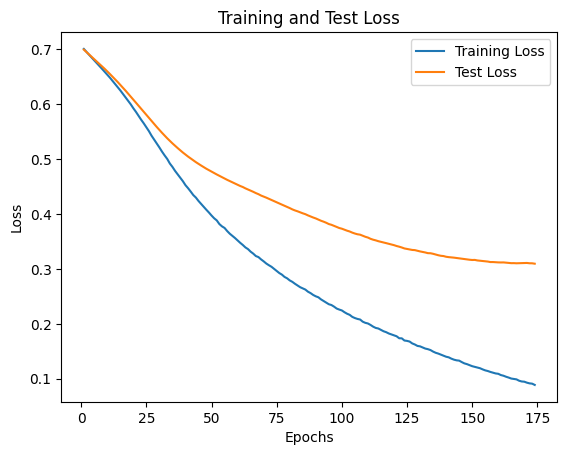

Accuracy: 0.9113
ROC_AUC: 0.8798


In [45]:
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32).unsqueeze(1)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_data = pd.read_csv("/content/trainee_train.csv")
y_train = train_data.iloc[:, 1]
X_train = train_data.loc[:, train_data.columns !='im']
X_train = X_train.drop(columns = X_train.columns[0])

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

train_dataset = CustomDataset(X_train_scaled, y_train)
test_dataset = CustomDataset(X_test_scaled, y_test.values)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=100, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=100, shuffle=False)

class NeuralNetwork(nn.Module):
    def __init__(self, input_size):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, 600)
        self.fc2 = nn.Linear(600, 400)
        self.fc3 = nn.Linear(400, 200)
        self.fc4 = nn.Linear(200, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        x = self.relu(x)
        x = self.fc4(x)
        x = self.sigmoid(x)
        return x

model = NeuralNetwork(input_size=X_train_scaled.shape[1])

criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-5)
num_epochs = 174

def train(model, optimizer, criterion, train_loader, test_loader, num_epochs):
    """
    params:
        model - torch.nn.Module to be fitted
        optimizer - model optimizer
        criterion - loss function from torch.nn
        train_loader - torch.utils.data.Dataloader with train set
    """
    train_losses = []
    test_losses = []
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for i, (X_train, y_train) in enumerate(train_loader):
            optimizer.zero_grad()
            y_pred = model(X_train)
            loss = criterion(y_pred, y_train)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        train_losses.append(running_loss / len(train_loader))
        model.eval()
        test_loss = 0.0
        with torch.no_grad():
            for X_test, y_test in test_loader:
                y_pred = model(X_test)
                loss = criterion(y_pred, y_test)
                test_loss += loss.item()
        test_losses.append(test_loss / len(test_loader))

        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_losses[-1]:.4f}, Test Loss: {test_losses[-1]:.4f}')

    return train_losses, test_losses

def evaluate_model(model, test_loader):
    model.eval()
    y_true = []
    y_pred = []
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            y_true.extend(y_batch.tolist())
            y_pred_batch = model(X_batch)
            y_pred.extend((y_pred_batch > 0.5).int().tolist())
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score (y_true, y_pred)
    recall = recall_score (y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred)
    difference.append(['СustomNetwork', accuracy, precision, recall, f1, roc_auc])
    print(f'Accuracy: {accuracy:.4f}')
    print(f'ROC_AUC: {roc_auc:.4f}')

train_losses, test_losses = train(model, optimizer, criterion, train_loader, test_loader, num_epochs)

plt.plot(range(1, num_epochs+1), train_losses, label='Training Loss')
plt.plot(range(1, num_epochs+1), test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Test Loss')
plt.legend()
plt.show()

evaluate_model(model, test_loader)

Перейдем к Градиентному бустингу

In [ ]:
model =  GradientBoostingClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Точность модели на тестовом наборе данных:", accuracy)

Точность модели на тестовом наборе данных: 0.8951612903225806


In [ ]:
model =  GradientBoostingClassifier()
kf = KFold(n_splits=5)
cv_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='accuracy')
print("Средняя оценка точности:", cv_scores.mean())

Средняя оценка точности: 0.8678622964337249


In [ ]:
grad_boost_model = GradientBoostingClassifier()
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7]
}
grid_search = GridSearchCV(grad_boost_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print("Наилучшие гиперпараметры:", grid_search.best_params_)
print("Лучшая оценка качества:", grid_search.best_score_)
test_accuracy = grid_search.best_estimator_.score(X_test, y_test)
print("Accuracy на тестовом наборе данных:", test_accuracy)

Наилучшие гиперпараметры: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 150}
Лучшая оценка качества: 0.8820243248814676
Accuracy на тестовом наборе данных: 0.8951612903225806


In [46]:
model = GradientBoostingClassifier(learning_rate = 0.1, max_depth = 3, n_estimators = 150)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
precision = precision_score (y_test, predictions)
recall = recall_score (y_test, predictions)
f1 = f1_score(y_test, predictions)
roc_auc = roc_auc_score(y_test, predictions)
difference.append(['GradientBoosting', accuracy, precision, recall, f1, roc_auc])
print("Точность модели на тестовом наборе данных:", accuracy)

Точность модели на тестовом наборе данных: 0.8951612903225806


Перейдем к CatBoostу.

In [ ]:
model =  CatBoostClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Точность модели на тестовом наборе данных:", accuracy)

Learning rate set to 0.00761
0:	learn: 0.6872301	total: 56.9ms	remaining: 56.8s
1:	learn: 0.6819008	total: 63.3ms	remaining: 31.6s
2:	learn: 0.6763785	total: 69.1ms	remaining: 22.9s
3:	learn: 0.6713093	total: 78.7ms	remaining: 19.6s
4:	learn: 0.6656095	total: 84.5ms	remaining: 16.8s
5:	learn: 0.6606960	total: 90.4ms	remaining: 15s
6:	learn: 0.6556157	total: 101ms	remaining: 14.3s
7:	learn: 0.6499316	total: 108ms	remaining: 13.3s
8:	learn: 0.6452789	total: 113ms	remaining: 12.5s
9:	learn: 0.6403250	total: 119ms	remaining: 11.8s
10:	learn: 0.6349982	total: 125ms	remaining: 11.2s
11:	learn: 0.6293738	total: 131ms	remaining: 10.8s
12:	learn: 0.6234996	total: 137ms	remaining: 10.4s
13:	learn: 0.6191056	total: 143ms	remaining: 10.1s
14:	learn: 0.6150895	total: 149ms	remaining: 9.81s
15:	learn: 0.6107443	total: 156ms	remaining: 9.58s
16:	learn: 0.6053434	total: 161ms	remaining: 9.34s
17:	learn: 0.5997456	total: 168ms	remaining: 9.15s
18:	learn: 0.5952578	total: 174ms	remaining: 8.96s
19:	lear

In [ ]:
model =  CatBoostClassifier()
kf = KFold(n_splits=5)
cv_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='accuracy')
print("Средняя оценка точности:", cv_scores.mean())

Выходные данные были обрезаны до нескольких последних строк (5000).
5:	learn: 0.6639376	total: 35.2ms	remaining: 5.83s
6:	learn: 0.6586588	total: 41.3ms	remaining: 5.86s
7:	learn: 0.6538748	total: 46.6ms	remaining: 5.78s
8:	learn: 0.6492771	total: 52.4ms	remaining: 5.78s
9:	learn: 0.6445836	total: 58ms	remaining: 5.74s
10:	learn: 0.6393029	total: 64.2ms	remaining: 5.77s
11:	learn: 0.6344274	total: 69.5ms	remaining: 5.72s
12:	learn: 0.6293602	total: 75.5ms	remaining: 5.73s
13:	learn: 0.6252280	total: 81.2ms	remaining: 5.71s
14:	learn: 0.6197761	total: 87ms	remaining: 5.71s
15:	learn: 0.6155560	total: 92.9ms	remaining: 5.71s
16:	learn: 0.6103930	total: 98.8ms	remaining: 5.71s
17:	learn: 0.6055684	total: 105ms	remaining: 5.7s
18:	learn: 0.6021422	total: 111ms	remaining: 5.72s
19:	learn: 0.5990852	total: 118ms	remaining: 5.77s
20:	learn: 0.5947920	total: 127ms	remaining: 5.9s
21:	learn: 0.5916023	total: 133ms	remaining: 5.91s
22:	learn: 0.5876841	total: 139ms	remaining: 5.92s
23:	learn: 0.

In [ ]:
catboost_model = CatBoostClassifier()
param_grid = {
    'iterations': [25, 50, 75, 100, 125, 150],  # Количество деревьев в ансамбле
    'learning_rate': [0.001, 0.01, 0.05, 0.1, 0.2, 0.5],  # Скорость обучения
    'depth': [1, 3, 5, 7, 9, 11]  # Максимальная глубина деревьев
}
grid_search = GridSearchCV(catboost_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train, verbose=False)
print("Наилучшие гиперпараметры:", grid_search.best_params_)
print("Лучшая оценка качества:", grid_search.best_score_)

test_accuracy = grid_search.best_estimator_.score(X_test, y_test)
print("Accuracy на тестовом наборе данных:", test_accuracy)

Наилучшие гиперпараметры: {'depth': 3, 'iterations': 50, 'learning_rate': 0.5}
Лучшая оценка качества: 0.8902082044939188
Accuracy на тестовом наборе данных: 0.9032258064516129


In [47]:
model = CatBoostClassifier(depth = 3, iterations = 50, learning_rate = 0.5)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
precision = precision_score (y_test, predictions)
recall = recall_score (y_test, predictions)
f1 = f1_score(y_test, predictions)
roc_auc = roc_auc_score(y_test, predictions)
difference.append(['CatBoost', accuracy, precision, recall, f1, roc_auc])
print("Точность модели на тестовом наборе данных:", accuracy)

0:	learn: 0.5434947	total: 4.25ms	remaining: 208ms
1:	learn: 0.4206803	total: 7.02ms	remaining: 168ms
2:	learn: 0.3876025	total: 9.99ms	remaining: 157ms
3:	learn: 0.3582339	total: 12.8ms	remaining: 147ms
4:	learn: 0.3279872	total: 16ms	remaining: 144ms
5:	learn: 0.3015691	total: 19ms	remaining: 139ms
6:	learn: 0.2747478	total: 21.9ms	remaining: 135ms
7:	learn: 0.2623679	total: 24.8ms	remaining: 130ms
8:	learn: 0.2470968	total: 27.6ms	remaining: 126ms
9:	learn: 0.2333242	total: 30.3ms	remaining: 121ms
10:	learn: 0.2212332	total: 34.7ms	remaining: 123ms
11:	learn: 0.2063560	total: 37.8ms	remaining: 120ms
12:	learn: 0.1931686	total: 40.4ms	remaining: 115ms
13:	learn: 0.1831880	total: 43.2ms	remaining: 111ms
14:	learn: 0.1674780	total: 46.1ms	remaining: 108ms
15:	learn: 0.1572740	total: 49ms	remaining: 104ms
16:	learn: 0.1505646	total: 51.7ms	remaining: 100ms
17:	learn: 0.1454650	total: 55.1ms	remaining: 98ms
18:	learn: 0.1393998	total: 58.4ms	remaining: 95.3ms
19:	learn: 0.1348828	total: 

Перейдем к XGB

In [ ]:
model =  XGBClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Точность модели на тестовом наборе данных:", accuracy)

Точность модели на тестовом наборе данных: 0.9112903225806451


In [ ]:
model = XGBClassifier()
kf = KFold(n_splits=5)
cv_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='accuracy')
print("Средняя оценка точности:", cv_scores.mean())

Средняя оценка точности: 0.8922077922077921


In [ ]:
xgb_model = XGBClassifier()
param_grid = {
    'n_estimators': [25, 50, 75, 100, 125, 150],
    'learning_rate': [0.001, 0.01, 0.05, 0.1, 0.2, 0.5],
    'max_depth': [1, 3, 5, 7, 9, 11]
}

grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train, verbose=False)
print("Наилучшие гиперпараметры:", grid_search.best_params_)
print("Лучшая оценка качества:", grid_search.best_score_)
test_accuracy = grid_search.best_estimator_.score(X_test, y_test)
print("Accuracy на тестовом наборе данных:", test_accuracy)


Наилучшие гиперпараметры: {'learning_rate': 0.5, 'max_depth': 7, 'n_estimators': 50}
Лучшая оценка качества: 0.8901257472686044
Accuracy на тестовом наборе данных: 0.9193548387096774


In [48]:
model = XGBClassifier(learning_rate = 0.5, max_depth = 7, n_estimators = 50)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
precision = precision_score (y_test, predictions)
recall = recall_score (y_test, predictions)
f1 = f1_score(y_test, predictions)
roc_auc = roc_auc_score(y_test, predictions)
difference.append(['XGBBoost', accuracy, precision, recall, f1, roc_auc])
print("Точность модели на тестовом наборе данных:", accuracy)

Точность модели на тестовом наборе данных: 0.9193548387096774


Основные модели мы перебрали, какие я считал целесообразными, теперь надо перейти к анализу данных

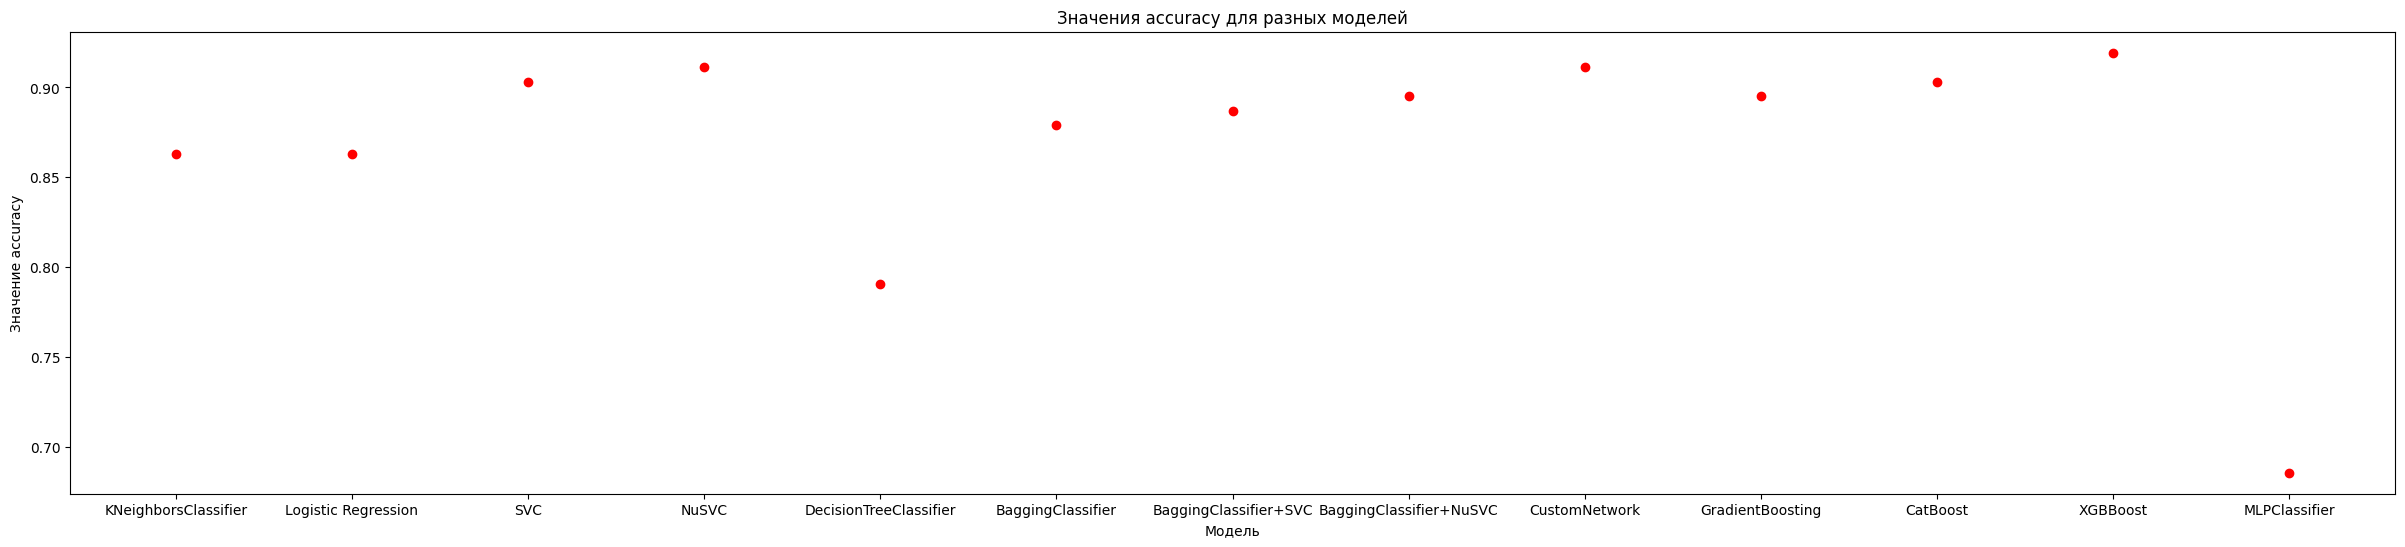

In [57]:
metric_index = 1

labels = [item[0] for item in difference]
metrics = [item[metric_index] for item in difference]

plt.figure(figsize=(30, 6))
plt.plot(labels, metrics, 'ro')
plt.xlabel('Модель')
plt.ylabel('Значение accuracy')
plt.title('Значения accuracy для разных моделей'.format(labels[0]))
plt.show()


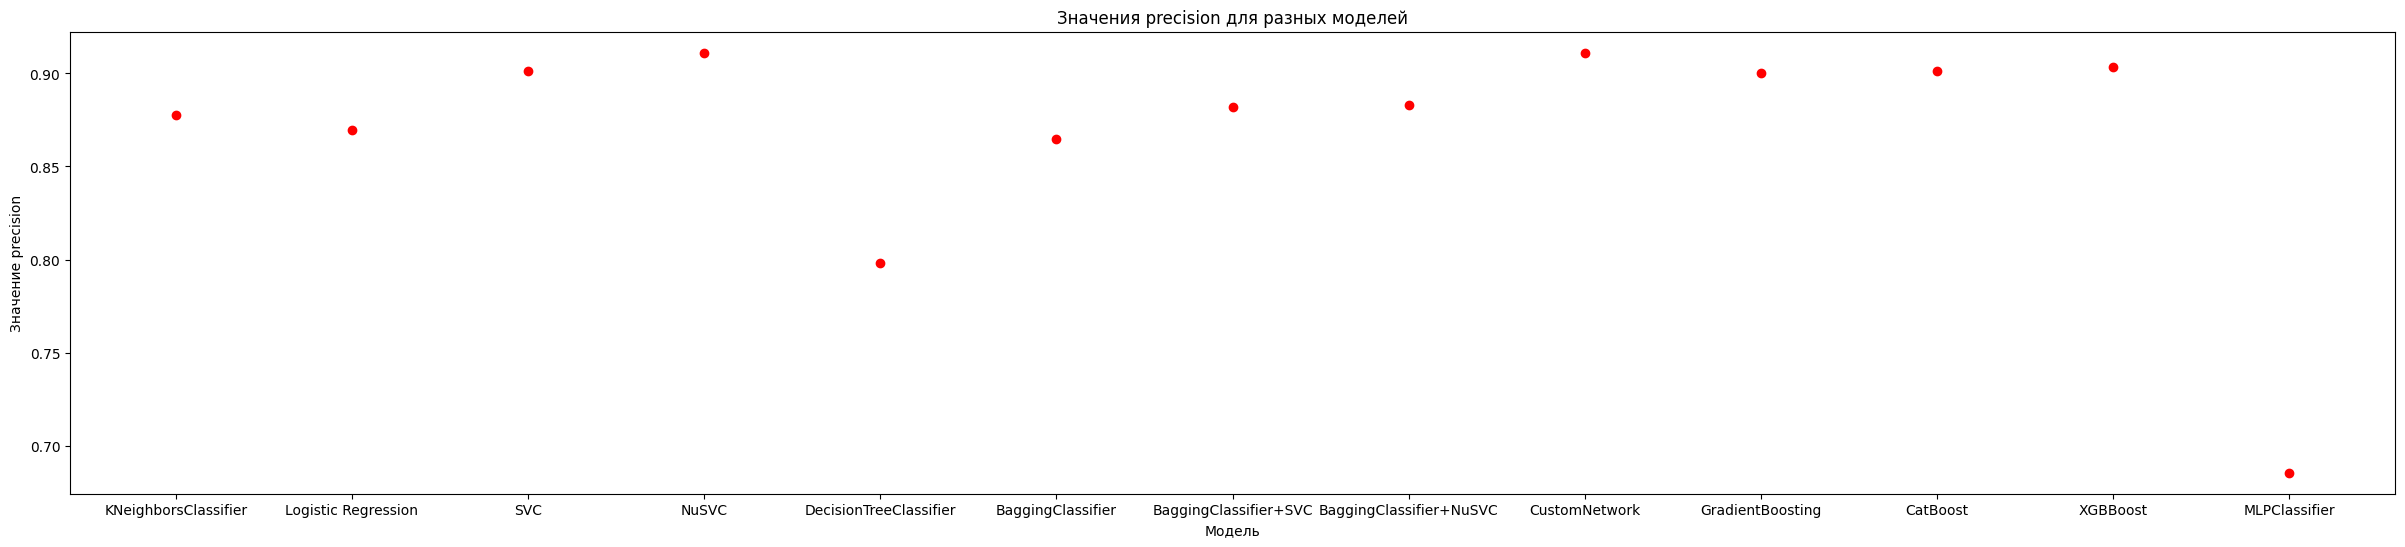

In [58]:
metric_index = 2

labels = [item[0] for item in difference]
metrics = [item[metric_index] for item in difference]

plt.figure(figsize=(30, 6))
plt.plot(labels, metrics, 'ro')
plt.xlabel('Модель')
plt.ylabel('Значение precision')
plt.title('Значения precision для разных моделей'.format(labels[0]))
plt.show()

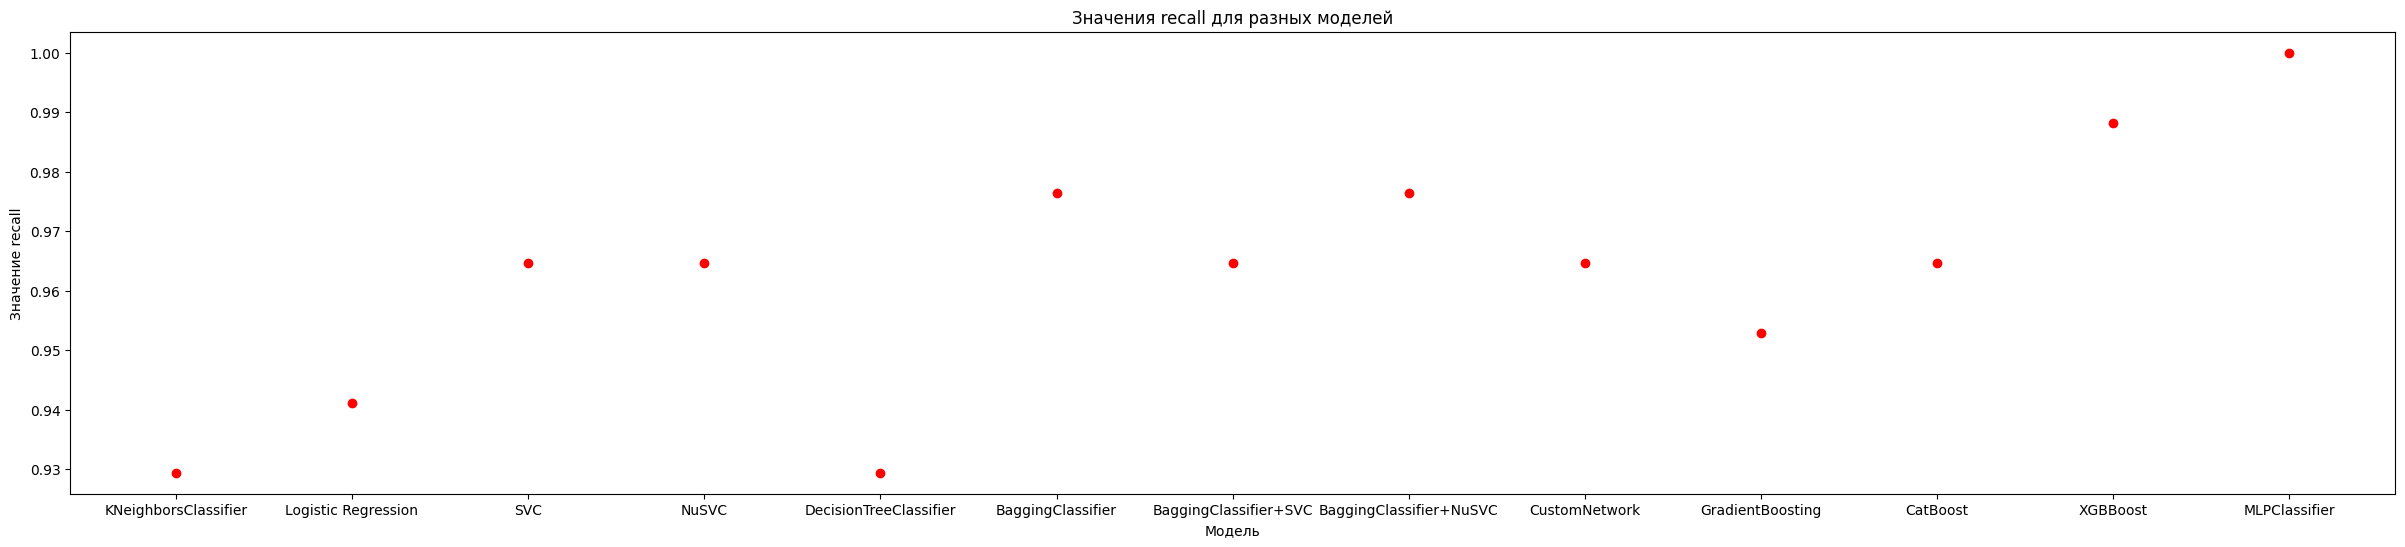

In [59]:
metric_index = 3

labels = [item[0] for item in difference]
metrics = [item[metric_index] for item in difference]

plt.figure(figsize=(30, 6))
plt.plot(labels, metrics, 'ro')
plt.xlabel('Модель')
plt.ylabel('Значение recall')
plt.title('Значения recall для разных моделей'.format(labels[0]))
plt.show()

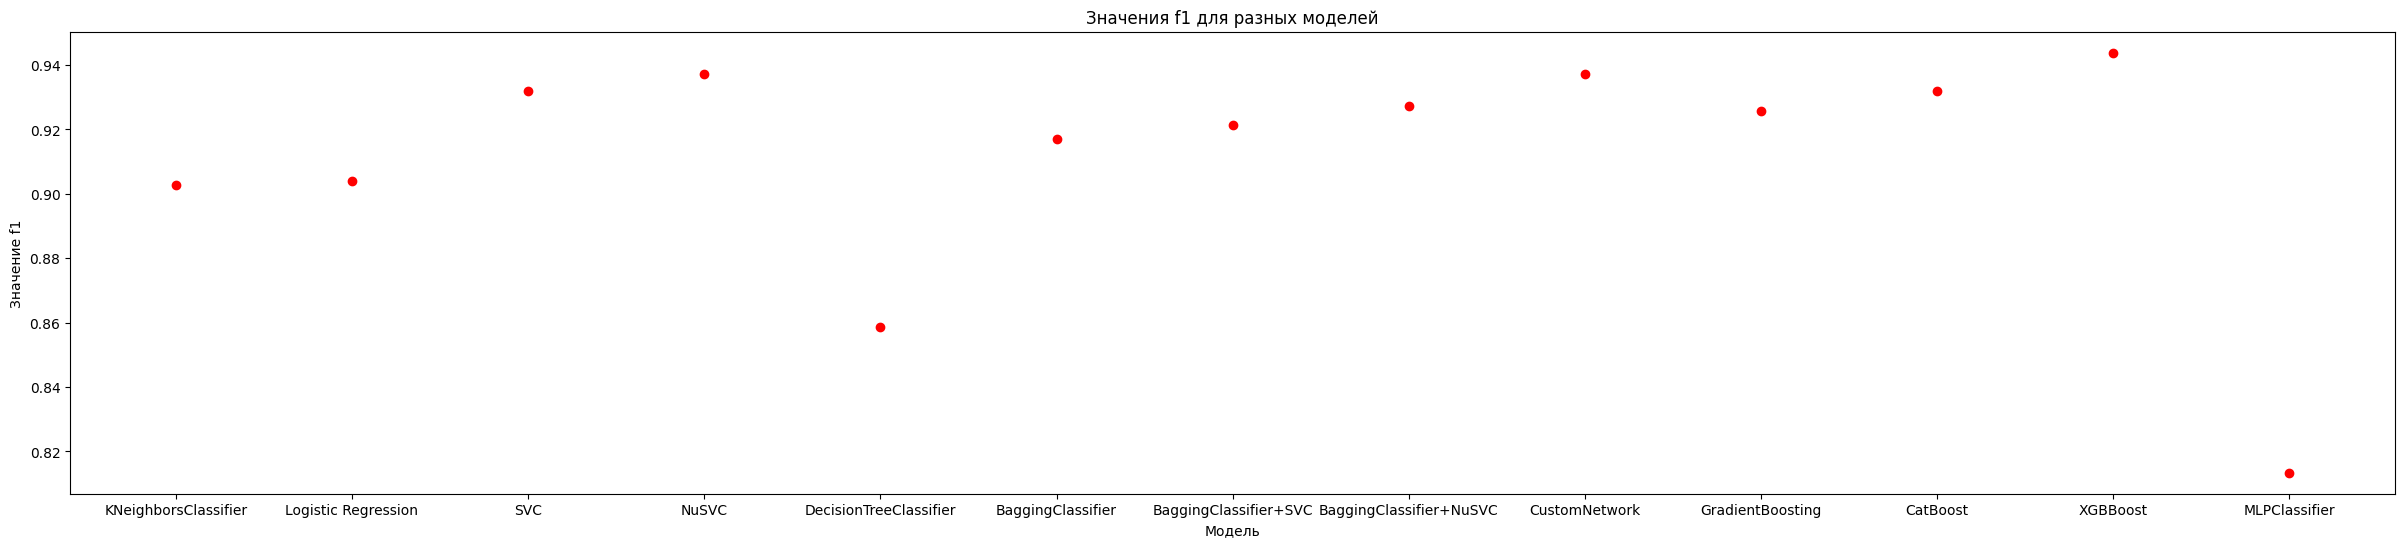

In [60]:
metric_index = 4

labels = [item[0] for item in difference]
metrics = [item[metric_index] for item in difference]

plt.figure(figsize=(30, 6))
plt.plot(labels, metrics, 'ro')
plt.xlabel('Модель')
plt.ylabel('Значение f1')
plt.title('Значения f1 для разных моделей'.format(labels[0]))
plt.show()

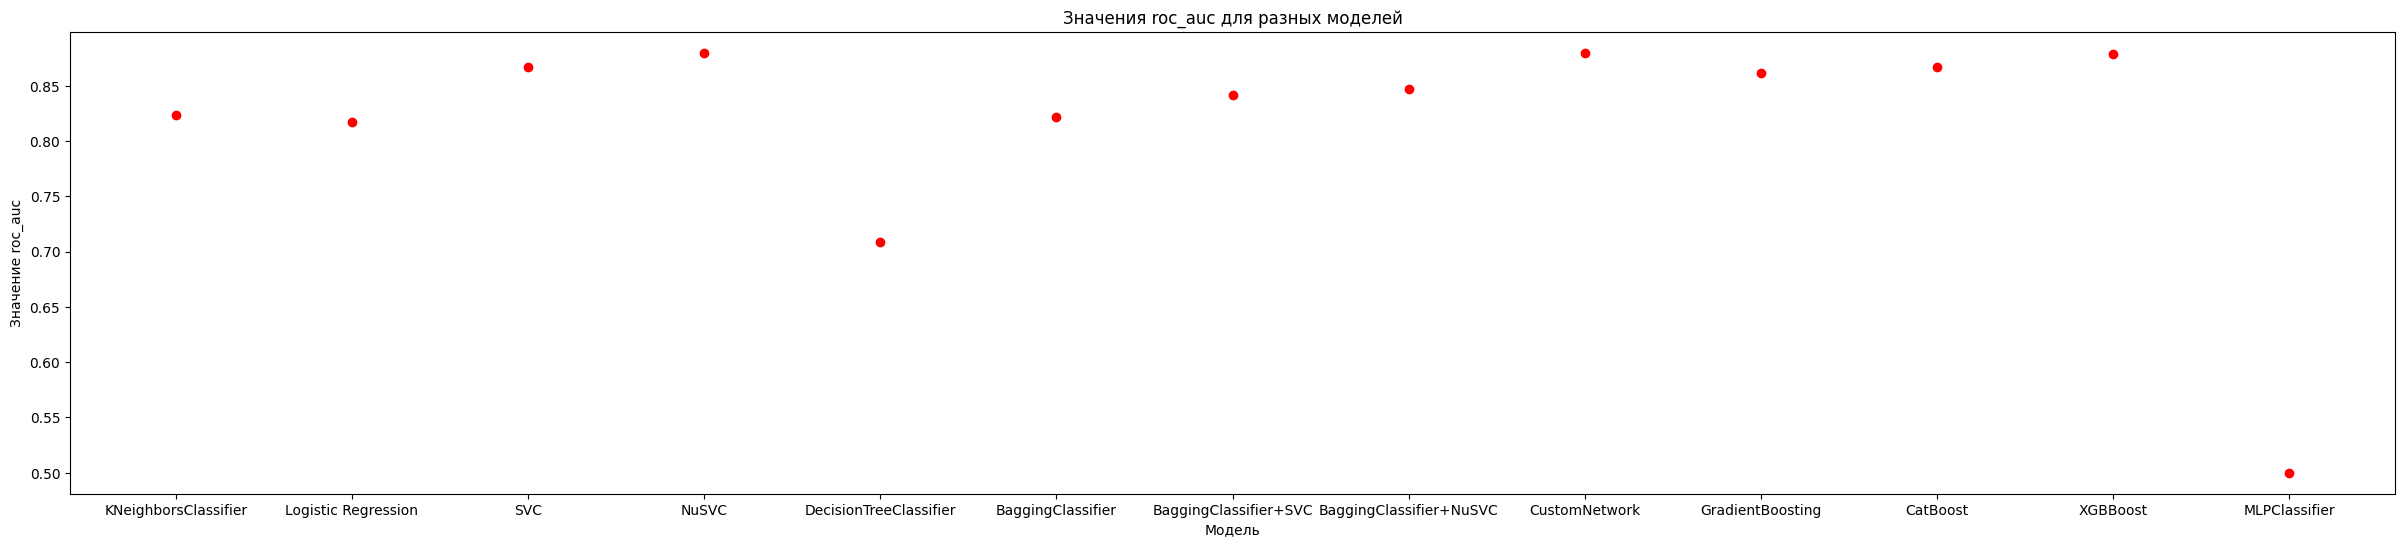

In [61]:
metric_index = 5

labels = [item[0] for item in difference]
metrics = [item[metric_index] for item in difference]

plt.figure(figsize=(30, 6))
plt.plot(labels, metrics, 'ro')
plt.xlabel('Модель')
plt.ylabel('Значение roc_auc')
plt.title('Значения roc_auc для разных моделей'.format(labels[0]))
plt.show()

In [62]:
models = [item[0] for item in difference]
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score', 'AUC-ROC']
df = pd.DataFrame(difference, columns=['Model'] + metrics)
df.set_index('Model', inplace=True)
print(df)

                         Accuracy  Precision    Recall  F1-score   AUC-ROC
Model                                                                     
KNeighborsClassifier     0.862903   0.877778  0.929412  0.902857  0.823680
Logistic Regression      0.862903   0.869565  0.941176  0.903955  0.816742
SVC                      0.903226   0.901099  0.964706  0.931818  0.866968
NuSVC                    0.911290   0.911111  0.964706  0.937143  0.879789
DecisionTreeClassifier   0.790323   0.797980  0.929412  0.858696  0.708296
BaggingClassifier        0.879032   0.864583  0.976471  0.917127  0.821569
BaggingClassifier+SVC    0.887097   0.881720  0.964706  0.921348  0.841327
BaggingClassifier+NuSVC  0.895161   0.882979  0.976471  0.927374  0.847210
СustomNetwork            0.911290   0.911111  0.964706  0.937143  0.879789
GradientBoosting         0.895161   0.900000  0.952941  0.925714  0.861086
CatBoost                 0.903226   0.901099  0.964706  0.931818  0.866968
XGBBoost                 

Таким образом, много моделей выдали хороший рок-аук. Лучшими стали моя кастомная модель, xgboost, NuSVC.
По итогу для заполнения итогового файла, возьмем NuSVC.

Заполним итоговый файл

In [68]:
test_data = pd.read_csv("/content/trainee_test_fish.csv")
test_data = test_data.drop(columns = test_data.columns[0])
test_data.head()
model = NuSVC(nu = 0.2, kernel = 'rbf')
model.fit(X_train, y_train)
predictions = model.predict(test_data)
test_data['predictions'] = predictions
test_data.to_csv('submission.csv', index = False)

Ну вот собственно и все. Я написал много кринжового и почти одинакового кода. Чуток порисовал, что-то получил. Ну чтож, посмотрим. Спасибо за задание!